# Digit Recognizer

## Goal

Idnetify digits from handwritten images.

## Setup

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

In [5]:
#Load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#Split training and validation set
train = train.to_numpy()
test = test.to_numpy()
split = len(train)*4//5
X_train = torch.from_numpy(train[:split,1:])
y_train = torch.from_numpy(train[:split,0])
X_val = torch.from_numpy(train[split:,1:])
y_val = torch.from_numpy(train[split:,0])

## Exploratory Data Analysis

Every observation is a image of size 28 * 28.

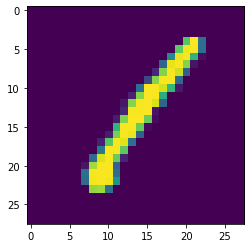

In [7]:
plt.imshow(X_train[0].reshape(28, 28))
plt.show()

There are ten digits to be identified.

In [8]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

## Model

In [28]:
class Net(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.softmax(x, dim=1)